In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Loading Data

In [ ]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from tqdm import tqdm
from tqdm.notebook import tqdm_notebook


In [ ]:
import nltk
from nltk.corpus import stopwords

In [ ]:
#train15 = pd.read_csv('/content/drive/MyDrive/Datasets/Amazon_ML_Challenge/Dataset/train.csv', escapechar = "\\", quoting = 3, nrows=500000)    #skiprows=range(1,500000),
#train10 = pd.read_csv('/content/drive/MyDrive/Datasets/Amazon_ML_Challenge/Dataset/train.csv', escapechar = "\\", quoting = 3, skiprows=range(1,500000), nrows=500000) 
train15 = pd.read_csv('/content/drive/MyDrive/Datasets/Amazon_ML_Challenge/Dataset/train.csv', escapechar = "\\", quoting = 3, skiprows=range(1,1000000), nrows=500000) 
#train20 = pd.read_csv('/content/drive/MyDrive/Datasets/Amazon_ML_Challenge/Dataset/train.csv', escapechar = "\\", quoting = 3, skiprows=range(1,1500000), nrows=500000) 
#train25 = pd.read_csv('/content/drive/MyDrive/Datasets/Amazon_ML_Challenge/Dataset/train.csv', escapechar = "\\", quoting = 3, skiprows=range(1,2000000), nrows=500000) 
#trainlast = pd.read_csv('/content/drive/MyDrive/Datasets/Amazon_ML_Challenge/Dataset/train.csv', escapechar = "\\", quoting = 3, skiprows=range(1,2500000), nrows=500000) 
#test= pd.read_csv('/content/drive/MyDrive/Datasets/Amazon_ML_Challenge/train.csv', escapechar = "\\",quoting = 3)

#sample_submission = pd.read_csv('/content/drive/MyDrive/Datasets/Amazon_ML_Challenge/dataset/sample_submission.csv')

In [ ]:
train15.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   TITLE           499990 non-null  object
 1   DESCRIPTION     375114 non-null  object
 2   BULLET_POINTS   471124 non-null  object
 3   BRAND           490083 non-null  object
 4   BROWSE_NODE_ID  500000 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 19.1+ MB


#Analyzing and cleaning

##Loading Data

In [ ]:
train15.head(3)

,TITLE,DESCRIPTION,BULLET_POINTS,BRAND,BROWSE_NODE_ID
0,Dogitos First Meow Healthy Cat Treats 40G (Chi...,Dogitos First Meow is a customized nutrition s...,[This contains essential nutrients so that the...,Dogitos,17686
1,Phoenix Roasted Makhana Indian Pudina & Dhania...,"<p>Lotus Seeds or Foxnuts, popularly also know...","[Quantity: 100 Gms.,Flavor: Indian Pudina & Dh...",Phoenix,32941
2,"Bigbanana Men's Regular Fit Polo (Singleton,Wh...","White and Blue striped T-shirt, has a polo col...","[Polo T-Shirt in Super Combed Cotton,Striped P...",Bigbanana,1213


In [ ]:
'''for name,df in zip(names,data):
  print(name,':')
  display(df.info())
  print()'''

train :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2903024 entries, 0 to 2903023
Data columns (total 5 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   TITLE           object
 1   DESCRIPTION     object
 2   BULLET_POINTS   object
 3   BRAND           object
 4   BROWSE_NODE_ID  int64 
dtypes: int64(1), object(4)
memory usage: 110.7+ MB


None


test :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110775 entries, 0 to 110774
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   PRODUCT_ID     110775 non-null  int64 
 1   TITLE          110768 non-null  object
 2   DESCRIPTION    100306 non-null  object
 3   BULLET_POINTS  103989 non-null  object
 4   BRAND          108345 non-null  object
dtypes: int64(1), object(4)
memory usage: 4.2+ MB


None

## Handling null values

In [ ]:
train15.isnull().sum()

TITLE                 10
DESCRIPTION       124886
BULLET_POINTS      28876
BRAND               9917
BROWSE_NODE_ID         0
dtype: int64

In [ ]:
train15 = train15.fillna(' ')

In [ ]:
#train = train.fillna('')

##Handling duplicates

In [ ]:
train15[train15.duplicated()]

,TITLE,DESCRIPTION,BULLET_POINTS,BRAND,BROWSE_NODE_ID
491,GENDER STREE Women Kurta Palazzo Set,Latest Style and Trendy Kurta Palazzo Set from...,"[Style - Kurta Palazzo Set, Gold Print,Fabric ...",GENDER STREE,1486
897,Boy's & Girl's Printed Cotton Blend T Shirt (...,PRIYA Cotton Graphic Printed Half Sleeve carto...,[Cotton blend fabric The printing of this t-sh...,Generic,1003
1931,savii Creation traditional look Cotton un Stit...,"This salwar suit dress material with dupatta, ...",[ITS COME WITH 2.5 METER SUIT PIECE 2.5 METER ...,SAVII,465
6622,Womens Trendz Handmade Silver Plated Anklet/Gh...,"Self Design, Partywear, Classy And Delicate De...",[Stylish Antique Silver Plated Anklet (1 Pair)...,Womens Trendz,1149
9708,Adidas Men's Running Shoes,,"[Material Type: Mesh,Lifestyle: Sports,Closure...",Adidas,701
...,...,...,...,...,...
499706,Soch Women's Straight Cotton Kurta,,"[Material: Cotton with three quarter sleeve,St...",Soch,1251
499719,Fadsho Designer Case for Lava Z90/Back Cover f...,Cases are designed in such a way that they per...,"[Silicon Cases with Gloss Finish printing,Sili...",FADSHO,1045
499794,Peter England Navy Shirt,,"[Color : Navy,Material : 100% Cotton,Fit : Sli...",Peter England,1024
499864,"KumkumArts Harry Potter Poster 12 x 18 Inch, H...",Kumkum Arts HD Posters Are High Quality HD Res...,"[HD Poster,Beautifully designed posters inspir...",Kumkum Arts,413


In [ ]:
train15.drop_duplicates(keep = 'first', inplace = True)

In [ ]:
train15.shape

(494042, 5)

##Visualizing data

In [ ]:
#train.head(3)

,TITLE,DESCRIPTION,BULLET_POINTS,BRAND,BROWSE_NODE_ID
0,"Pete The Cat Bedtime Blues Doll, 14.5 Inch","Pete the Cat is the coolest, most popular cat ...","[Pete the Cat Bedtime Blues plush doll,Based o...",MerryMakers,0
1,"The New Yorker NYHM014 Refrigerator Magnet, 2 ...",The New Yorker Handsome Cello Wrapped Hard Mag...,[Cat In A Tea Cup by New Yorker cover artist G...,The New Yorker,1
2,The Ultimate Self-Sufficiency Handbook: A Comp...,,Skyhorse Publishing,imusti,2


In [ ]:
#nodeid_distribution = (train['BROWSE_NODE_ID'].value_counts()/len(train['BROWSE_NODE_ID']))*100
#nodeid_distribution

1045       6.884774
5          2.365386
1251       1.769033
1052       1.553830
4          1.214444
             ...   
2064271    0.000036
196697     0.000036
1602927    0.000036
2586763    0.000036
2153849    0.000036
Name: BROWSE_NODE_ID, Length: 9919, dtype: float64

In [ ]:
#cumsum = np.cumsum(nodeid_distribution.values)
#cumsum

array([  6.88477368,   9.25015973,  11.01919308, ...,  99.99992861,
        99.99996431, 100.        ])

In [ ]:
#cumsum_index = list(range(0,len(cumsum)))

In [ ]:
#np.argwhere(cumsum>95)[0]

array([2791])

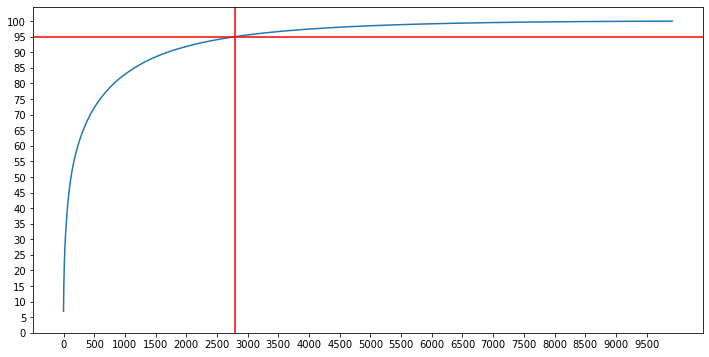

In [ ]:
'''plt.figure(figsize = (12,6))
plt.plot(cumsum_index,cumsum)
plt.axhline(95, c='red')
plt.axvline(2790, c='red')
plt.yticks(np.arange(0,101,5))
plt.xticks(np.arange(0,10000,500))
plt.show()'''

In [ ]:
#brand_count = train['BRAND'].value_counts()

In [ ]:
#brand_distribution = (train['BRAND'].value_counts()/len(train['BRAND']))*100
#brand_distribution

Generic                      3.683416
                             2.022038
Puma                         0.489304
United Colors of Benetton    0.409847
Max                          0.383826
                               ...   
Klass Home Collection        0.000036
I IHAYNER                    0.000036
nhgf                         0.000036
Orange Toys                  0.000036
SENICC                       0.000036
Name: BRAND, Length: 258266, dtype: float64

In [ ]:
#brand_cumsum = np.cumsum(brand_distribution.values)
#brand_cumsum

array([  3.68341585,   5.70545381,   6.19475786, ...,  99.99992861,
        99.9999643 , 100.        ])

In [ ]:
#np.argwhere(brand_cumsum>90)[0]

array([68652])

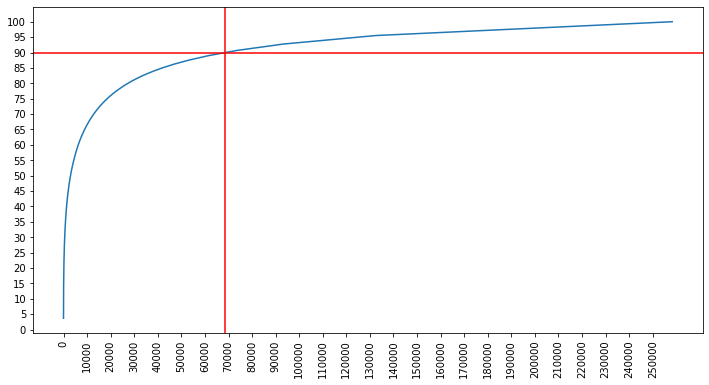

In [ ]:
'''plt.figure(figsize = (12,6))
plt.plot(brand_cumsum)
plt.axhline(90, c='red')
plt.axvline(68652, c='red')
plt.yticks(np.arange(0,101,5))
plt.xticks(np.arange(0,258266,10000), rotation=90)
plt.show()'''

In [ ]:
#brand_count[brand_count>50]

Generic                      103192
                              56648
Puma                          13708
United Colors of Benetton     11482
Max                           10753
                              ...  
JIVA                             51
A-TEX INDIA                      51
G-Shock                          51
Start Makers                     51
Verbier                          51
Name: BRAND, Length: 7730, dtype: int64

## Text Cleaning

In [ ]:
train15.head(3)

,TITLE,DESCRIPTION,BULLET_POINTS,BRAND,BROWSE_NODE_ID
0,Dogitos First Meow Healthy Cat Treats 40G (Chi...,Dogitos First Meow is a customized nutrition s...,[This contains essential nutrients so that the...,Dogitos,17686
1,Phoenix Roasted Makhana Indian Pudina & Dhania...,"<p>Lotus Seeds or Foxnuts, popularly also know...","[Quantity: 100 Gms.,Flavor: Indian Pudina & Dh...",Phoenix,32941
2,"Bigbanana Men's Regular Fit Polo (Singleton,Wh...","White and Blue striped T-shirt, has a polo col...","[Polo T-Shirt in Super Combed Cotton,Striped P...",Bigbanana,1213


In [ ]:
train15['TEXT'] = train15['TITLE'] + ' ' + train15['DESCRIPTION'] + ' ' + train15['BULLET_POINTS'] + ' ' + train15['BRAND']
#train['TEXT'] = train['TITLE'] + ' ' + train['DESCRIPTION'] + ' ' + train['BULLET_POINTS'] + ' ' + train['BRAND']

In [ ]:
train15 = train15.drop(['TITLE', 'DESCRIPTION', 'BULLET_POINTS', 'BRAND'], axis=1)
#train = train.drop(['TITLE', 'DESCRIPTION', 'BULLET_POINTS', 'BRAND'], axis=1)

In [ ]:
train15.head(3)

,BROWSE_NODE_ID,TEXT
0,17686,Dogitos First Meow Healthy Cat Treats 40G (Chi...
1,32941,Phoenix Roasted Makhana Indian Pudina & Dhania...
2,1213,"Bigbanana Men's Regular Fit Polo (Singleton,Wh..."


##Nltk

In [ ]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# import these modules
from nltk.stem import WordNetLemmatizer
  
lemmatizer = WordNetLemmatizer()

In [ ]:
from nltk import word_tokenize
nltk.download('punkt')
nltk.download('wordnet')
word_tokenize('hi I am')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


['hi', 'I', 'am']

In [ ]:
def clean(text):

  cleanr = re.compile('<[^>]*>')           #html
  cleantext = re.sub(cleanr, ' ', text)

  cleantext = re.sub("[-]", " " , cleantext)

  cleantext = re.sub("[^A-Za-z ]", " " , cleantext)
  cleantext = cleantext.lower()

  words = nltk.tokenize.word_tokenize(cleantext)
  words_new = [i for i in words if i not in stop_words]

  w = [lemmatizer.lemmatize(word) for word in words_new if len(word)>2]

  return ' '.join(w)

In [ ]:
clean('Pete The Cat Bedtime,virat-kohli Blues Doll, <br> sj </br> 14.5Inch 99brilliance')

'pete cat bedtime virat kohli blue doll inch brilliance'

In [ ]:
train15['TEXT'] = tqdm(train15['TEXT'].apply(clean))

100%|██████████| 494042/494042 [00:00<00:00, 1934423.64it/s]


In [ ]:
#train['TEXT'] = tqdm_notebook(train['TEXT'].apply(clean))

In [ ]:
train15.head(3)

,BROWSE_NODE_ID,TEXT
0,17686,dogitos first meow healthy cat treat chicken s...
1,32941,phoenix roasted makhana indian pudina dhania l...
2,1213,bigbanana men regular fit polo singleton white...


In [ ]:
#train.head(3)

# Making clean CSVs

In [ ]:
train15.to_csv('/content/drive/MyDrive/Datasets/Amazon_ML_Challenge/train_clean15L.csv', index = False)
#train.to_csv('/content/drive/MyDrive/Datasets/Amazon_ML_Challenge/dataset/train_clean.csv', index = False)

In [ ]:
#del(train15)

# Loading Clean Data

In [ ]:
'''train = pd.read_csv('/content/drive/MyDrive/Datasets/Amazon_ML_Challenge/dataset/train_clean.csv')
train = pd.read_csv('/content/drive/MyDrive/Datasets/Amazon_ML_Challenge/dataset/train_clean.csv')

data = [train, train]
names = ['train', 'train']'''

In [ ]:
'''for df in data:
  print(df.isnull().sum())'''

TITLE                122
DESCRIPTION       708134
BULLET_POINTS     165024
BRAND              63403
BROWSE_NODE_ID         0
dtype: int64
PRODUCT_ID           0
TITLE                7
DESCRIPTION      10483
BULLET_POINTS     6799
BRAND             2588
dtype: int64


In [ ]:
'''train = train.fillna(' ')
train = train.fillna(' ')'''

In [ ]:
'''train.head(3)'''

,TITLE,DESCRIPTION,BULLET_POINTS,BRAND,BROWSE_NODE_ID
0,pete cat bedtime blues doll inch,pete cat coolest popular cat town new pete the...,pete cat bedtime blues plush dollbased popular...,merrymakers,0
1,new yorker nyhm refrigerator magnet x,new yorker handsome cello wrapped hard magnet ...,cat tea cup new yorker cover artist gurbuz dog...,new yorker,1
2,ultimate selfsufficiency handbook complete gui...,,skyhorse publishing,imusti,2


#END